## PMS Flores

- ~~avg time per annotation~~
- ~~daily language~~
- ~~proficiency level~~
- ~~has grammar~~
- ~~use grammar~~
- ~~source~~
- ~~age~~
- evaluation score

In [1]:
import os
import json
import matplotlib.pyplot as plt
import glob
from collections import Counter
import pandas as pd
import matplotlib as mpl

plt.style.use('seaborn-v0_8-colorblind')
mpl.rcParams["hatch.color"] = 'white'
FOLDER = "data/raw/submissions_20251118_000001/pms/"

mpl.rcParams["hatch.color"] = 'white'

plt.rcParams['font.size'] = 16 # 10
plt.rcParams['axes.titlesize'] = 16 # large
plt.rcParams['axes.labelsize'] = 16 # medium
plt.rcParams['xtick.labelsize'] = 16 # medium
plt.rcParams['ytick.labelsize'] = 16 # medium
plt.rcParams['legend.fontsize'] = 16 # medium
plt.rcParams['figure.titlesize'] = 16 # large
                             

In [2]:
files = glob.glob(FOLDER + "*.json")
data = []
for file in files:
    with open(file, 'r') as f:
        data.append(json.load(f))

In [3]:
def plot_data(data, data_key, other_key, title, xlabel, translation_map={}, rot=0, ax = None, file=None):
    df = {}
    feature = []
    for entry in data:
        feature.append(entry["data"][data_key])
        if other_key:
            feature.append(entry["data"][other_key])
        
    feature = [p for p in feature if p != ""]
    feature = [translation_map.get(p, p) for p in feature]
    feature = [p for p in feature if p != "" and p != "Other"]

    feature_counts = Counter(feature)
    keys, values = zip(*sorted(feature_counts.items(), key=lambda x: -x[1]))
    df['labels'] = keys
    df['all'] = values
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
    ax.bar([i - 0.2 for i in range(len(keys))], values, label="All", width=0.4)
    ax.set_xticks(range(len(feature_counts)))
    ax.set_xticklabels(labels=keys, rotation=rot)
    ax.set_yticks(range(0, max(feature_counts.values()) + 1, 20))
    ax.set_ylabel("Number of annotations")
    ax.set_title(title)
    ax.set_xlabel(xlabel)

    feature = []
    for entry in data:
        if not entry["data"]["empty"]:
            feature.append(entry["data"][data_key])
            if other_key:
                feature.append(entry["data"][other_key])
        
    feature = [p for p in feature if p != ""]
    feature = [translation_map.get(p, p) for p in feature]
    feature_counts = Counter(feature)
    values = [feature_counts.get(k, 0) for k in keys]
    df['translated'] = values
    ax.bar([i + 0.2 for i in range(len(keys))], values, label="Translated", width=0.4, hatch='//')
    ax.legend()
    
    fig.tight_layout()
    if file:
        plt.savefig(file)
    plt.show()
    return pd.DataFrame(df)

## Time per annotation

Average time (minutes): 6.122477071273032
Removed entries: 1
Translated average time (minutes): 7.3396230641891895
Empty average time (minutes): 2.5903671310457512
Removed entries: 1


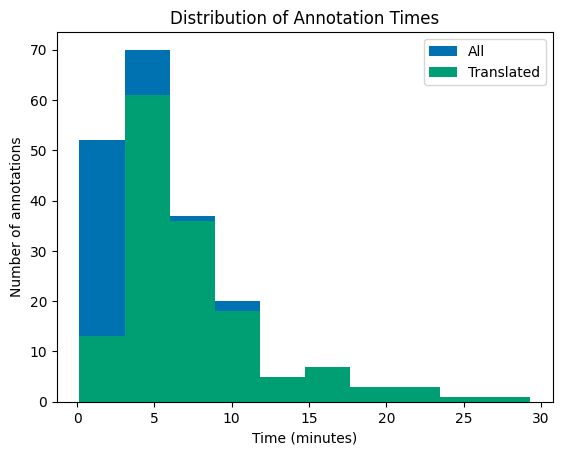

In [81]:
times = []
for entry in data:
    times.append(entry["time"])
plot_times = [float(t)/60 for t in times if float(t) < 3600]
print("Average time (minutes):", sum(plot_times)/len(plot_times))
print("Removed entries:", len(times) - len(plot_times))
plt.hist(plot_times, label="All")
times = []
no_times = []
for entry in data:
    if not entry["data"]["empty"]:
        times.append(entry["time"])
    else:
        no_times.append(entry["time"])

plot_times = [float(t)/60 for t in times if float(t) < 3600]
no_times = [float(t)/60 for t in no_times if float(t) < 3600]
print("Translated average time (minutes):", sum(plot_times)/len(plot_times))
print("Empty average time (minutes):", sum(no_times)/len(no_times))
print("Removed entries:", len(times) - len(plot_times))
plt.hist(plot_times, label="Translated")
plt.legend()
plt.xlabel("Time (minutes)")
plt.ylabel("Number of annotations")
plt.title("Distribution of Annotation Times")
plt.savefig("plots/annotation_times.pdf")
plt.show()

In [7]:
print("Avg. time with translation:", sum(plot_times)/len(plot_times))

Avg. time with translation: 7.3396230641891895


## Groups

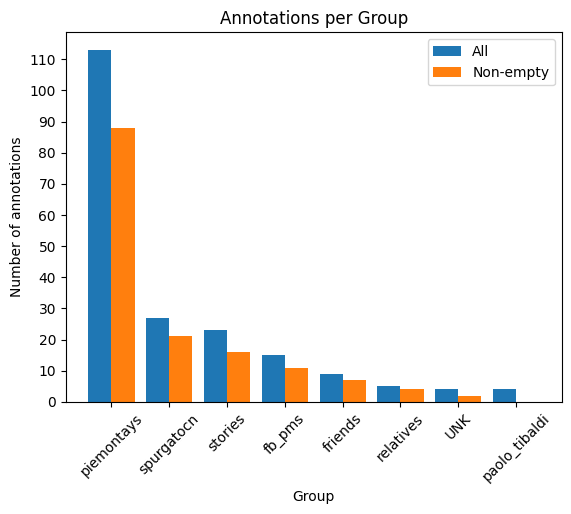

In [67]:
groups = []
for entry in data:
    groups.append(entry.get("group", "unknown"))
group_counts = Counter(groups)
keys, values = zip(*sorted(group_counts.items(), key=lambda x: -x[1]))
plt.bar([i - 0.2 for i in range(len(keys))], values, label="All", width=0.4)
plt.xlabel("Group")
plt.xticks(range(len(group_counts)),keys, rotation=45)
plt.yticks(range(0, max(values) + 1, 10))
plt.ylabel("Number of annotations")
plt.title("Annotations per Group")

groups = []
for entry in data:
    if not entry["data"]["empty"]:
        groups.append(entry.get("group", "unknown"))
group_counts = Counter(groups)
values = [group_counts.get(k, 0) for k in keys]
plt.bar([i + 0.2 for i in range(len(keys))], values, label="Non-empty", width=0.4)
plt.legend()
plt.show()


## Daily language

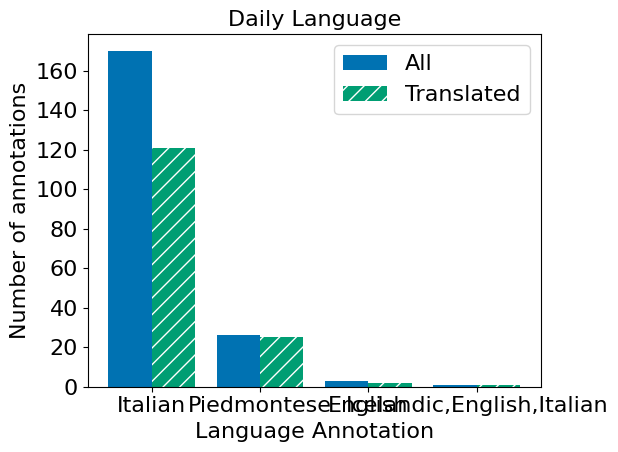

,labels,all,translated
0,Italian,170,121
1,Piedmontese,26,25
2,English,3,2
3,"Icelandic,English,Italian",1,1


In [4]:
translation_map = {
    "Piemontese": "Piedmontese",
    "Italiano": "Italian",
    "Inglese": "English",
    "Altro": "Other",
    "Islandese,Inglese,Italiano": "Icelandic,English,Italian",
}
daily = plot_data(data, "daily-language", "daily-language-other", "Daily Language", "Language Annotation", translation_map, file="plots/daily_language.pdf")
daily

## Proficiency level

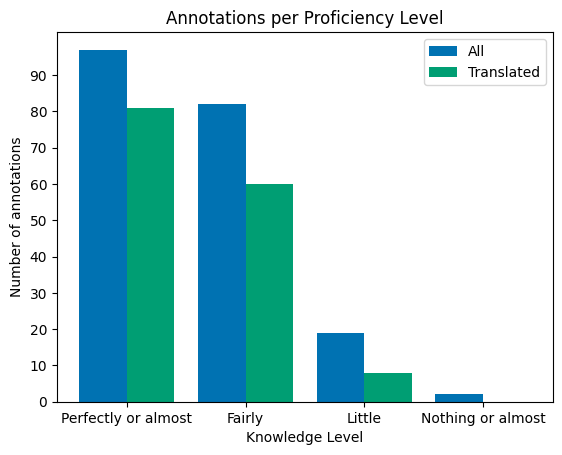

,labels,all,translated
0,Perfectly or almost,97,81
1,Fairly,82,60
2,Little,19,8
3,Nothing or almost,2,0


In [21]:
translation_map = {
    "Perfettamente o quasi, riesco a esprimere praticamente tutto": "Perfectly or almost",
    "Abbastanza, ma a volte lo mischio con l'italiano (o la lingua che uso principalmente)": "Fairly",
    "Poco, conosco alcune espressioni, ma faccio fatica a esprimere rasi nuove": "Little",    
    "Niente o quasi, solo qualche parola": "Nothing or almost",
}
plot_data(data, "proficiency", None, "Annotations per Proficiency Level", "Knowledge Level", translation_map, file="plots/proficiency_distribution.pdf")

In [12]:
def tmp_plot(data, data_key, other_key, title, xlabel, translation_map={}, rot=0, fig=None, ax = None):
    df = {}
    feature = []
    for entry in data:
        feature.append(entry["data"][data_key])
        if other_key:
            feature.append(entry["data"][other_key])
        
    feature = [p for p in feature if p != ""]
    feature = [translation_map.get(p, p) for p in feature]
    # feature = [p for p in feature if p != "" and p != "Other"]

    feature_counts = Counter(feature)
    keys, values = zip(*sorted(feature_counts.items(), key=lambda x: -x[1]))
    df['labels'] = keys
    df['all'] = values
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
    ax.bar([i - 0.2 for i in range(len(keys))], values, label="All", width=0.4, hatch='..')
    for i in range(len(keys)):
        ax.text(i - 0.2, values[i] + 5, str(values[i]), ha='center')
    ax.set_xticks(range(len(feature_counts)))
    ax.set_xticklabels(labels=keys, rotation=rot)
    # ax.set_yticks(range(0, max(feature_counts.values()) + 1, 20))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylim(0,200)

    feature = []
    for entry in data:
        if not entry["data"]["empty"]:
            feature.append(entry["data"][data_key])
            if other_key:
                feature.append(entry["data"][other_key])
        
    feature = [p for p in feature if p != ""]
    feature = [translation_map.get(p, p) for p in feature]
    feature_counts = Counter(feature)
    values = [feature_counts.get(k, 0) for k in keys]
    df['translated'] = values
    ax.bar([i + 0.2 for i in range(len(keys))], values, label="Translated", width=0.4, hatch='///')
    for i in range(len(keys)):
        ax.text(i + 0.2, values[i] + 5, str(values[i]), ha='center')
    
    return fig, ax, pd.DataFrame(df)

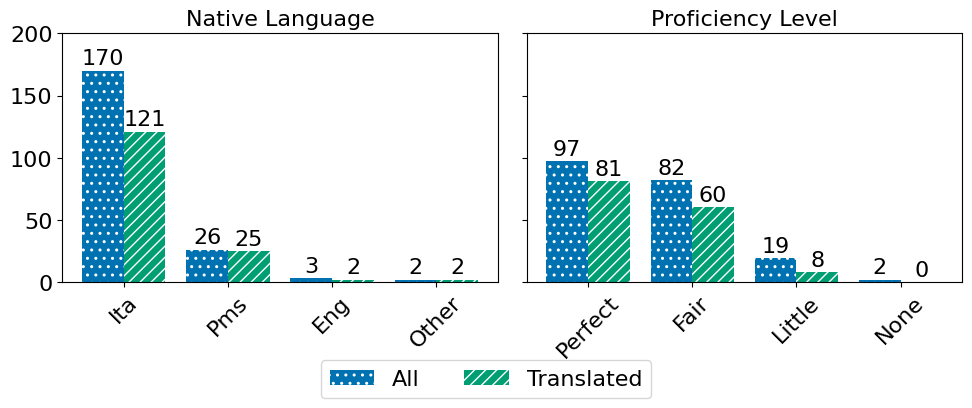

In [16]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

translation_map = {
    "Piemontese": "Pms",
    "Italiano": "Ita",
    "Inglese": "Eng",
    "Altro": "Other",
    "Islandese,Inglese,Italiano": "Other",
}
fig, axs[0], _ = tmp_plot(data, "daily-language", "daily-language-other", "Native Language", "", translation_map, rot=45, fig=fig, ax=axs[0])

translation_map = {
    "Perfettamente o quasi, riesco a esprimere praticamente tutto": "Perfect",
    "Abbastanza, ma a volte lo mischio con l'italiano (o la lingua che uso principalmente)": "Fair",
    "Poco, conosco alcune espressioni, ma faccio fatica a esprimere rasi nuove": "Little",    
    "Niente o quasi, solo qualche parola": "None",
}
fig, axs[1], _ = tmp_plot(data, "proficiency", None, "Proficiency Level", "", translation_map, rot=45, fig=fig, ax=axs[1])


# legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncols=2, bbox_to_anchor=(0.5, -0.06))
fig.tight_layout()
fig.savefig("plots/language_and_proficiency.pdf")

## Grammar

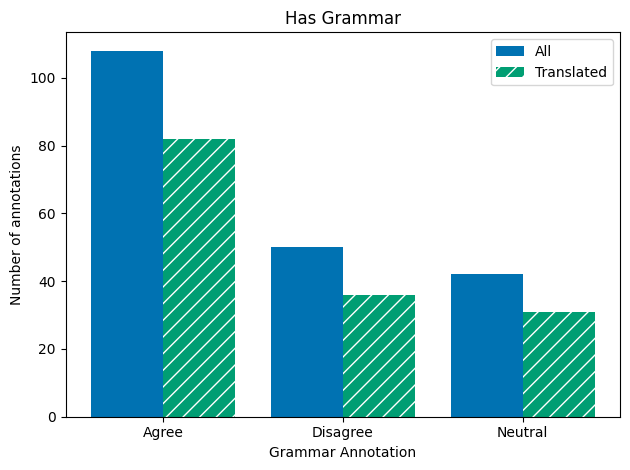

In [82]:
translation_map = {
    "D'accordo": "Agree",
    "In disaccordo": "Disagree",
    "Neutrale": "Neutral",
}

grammar = plot_data(data, "grammar", None, "Has Grammar", "Grammar Annotation", translation_map)

In [83]:
grammar

,labels,all,translated
0,Agree,108,82
1,Disagree,50,36
2,Neutral,42,31


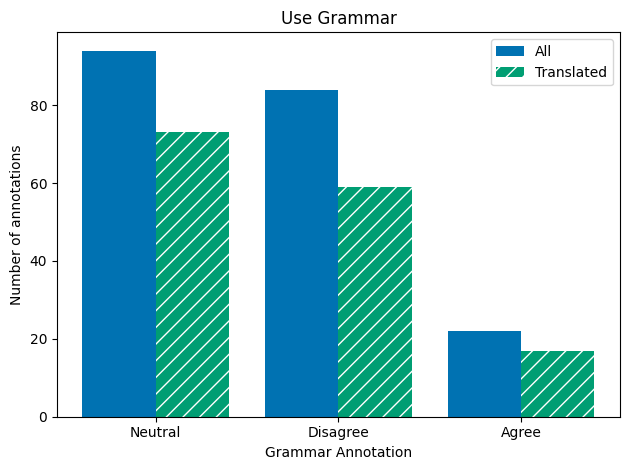

In [91]:
translation_map = {
    "D'accordo": "Agree",
    "In disaccordo": "Disagree",
    "Neutrale": "Neutral",
}

use_grammar = plot_data(data, "use", None, "Use Grammar", "Grammar Annotation", translation_map)

In [92]:
use_grammar

,labels,all,translated
0,Neutral,94,73
1,Disagree,84,59
2,Agree,22,17


In [89]:
grammar_results = {
    ("Agree", "Agree"): 0,
    ("Agree", "Disagree"): 0,
    ("Agree", "Neutral"): 0,
    ("Disagree", "Agree"): 0,
    ("Disagree", "Disagree"): 0,
    ("Disagree", "Neutral"): 0,
    ("Neutral", "Agree"): 0,
    ("Neutral", "Disagree"): 0,
    ("Neutral", "Neutral"): 0,
}
for entry in data:
    has = entry["data"]["grammar"] = translation_map.get(entry["data"]["grammar"], entry["data"]["grammar"])
    use = entry["data"]["use"] = translation_map.get(entry["data"]["use"], entry["data"]["use"])
    grammar_results[(has, use)] += 1
grammar_df = pd.DataFrame.from_dict(grammar_results, orient='index', columns=['count'])
grammar_df.index = pd.MultiIndex.from_tuples(grammar_df.index, names=['Has Grammar', 'Uses Grammar'])
grammar_df = grammar_df.unstack(level='Uses Grammar').fillna(0)
grammar_df.columns = grammar_df.columns.droplevel()
grammar_df = grammar_df.reindex(index=["Agree", "Disagree", "Neutral"], columns=["Agree", "Disagree", "Neutral"])
grammar_df

Uses Grammar,Agree,Disagree,Neutral
Has Grammar,,,
Agree,16,35,57
Disagree,3,32,15
Neutral,3,17,22


In [94]:
print(grammar_df.to_latex())

\begin{tabular}{lrrr}
\toprule
Uses Grammar & Agree & Disagree & Neutral \\
Has Grammar &  &  &  \\
\midrule
Agree & 16 & 35 & 57 \\
Disagree & 3 & 32 & 15 \\
Neutral & 3 & 17 & 22 \\
\bottomrule
\end{tabular}



## Language Source

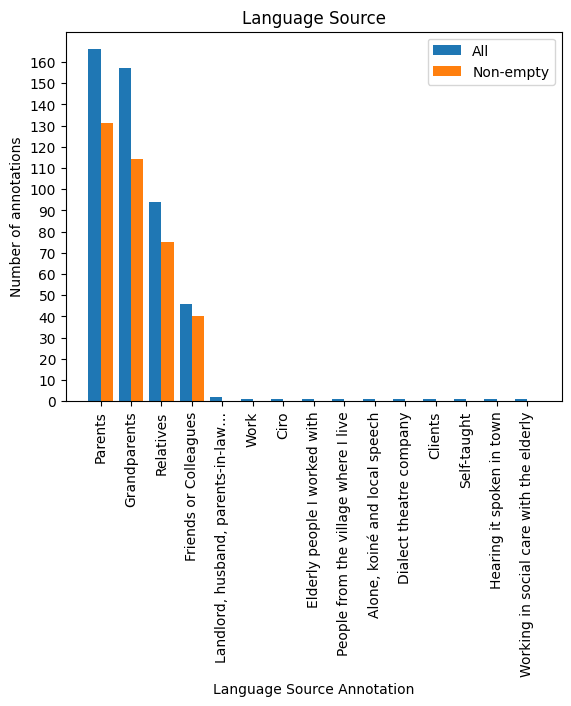

In [91]:
translation_map = {
    'Genitori': 'Parents',
    'Nonni': 'Grandparents',
    'Parenti': 'Relatives',
    'Amici o Colleghi': 'Friends or Colleagues',
    'Altro': 'Other',
    'Padrone di casa, marito, suoceri…': 'Landlord, husband, parents-in-law…',
    'Lavoro': 'Work',
    'Ciro': 'Ciro',
    'Persone anziane con cui ho lavorato': 'Elderly people I worked with',
    'Persone de paese dove vivo': 'People from the village where I live',
    'Da solo, koiné ed astesano ': 'Alone, koiné and local speech',
    'Compagnia teatrale dialettale': 'Dialect theatre company',
    'Clienti ': 'Clients',
    'Da autodidatta ': 'Self-taught',
    'Sentendolo parlare in paese': 'Hearing it spoken in town',
    'Lavorando nel sociale con gli anziani': 'Working in social care with the elderly',
}

data_key = "language-source"
other_key = "other-language-source"
title = "Language Source"
xlabel = "Language Source Annotation"

feature = []
for entry in data:
    feature.extend(entry["data"][data_key])
    if other_key:
        feature.append(entry["data"][other_key])
    
feature = [p for p in feature if p != ""]
feature = [translation_map.get(p, p) for p in feature]
feature = [p for p in feature if p != "" and p != "Other"]

feature_counts = Counter(feature)
keys, values = zip(*sorted(feature_counts.items(), key=lambda x: -x[1]))
plt.bar([i - 0.2 for i in range(len(keys))], values, label="All", width=0.4)
plt.xticks(range(len(feature_counts)), labels = keys, rotation=90)
plt.yticks(range(0, max(feature_counts.values()) + 1, 10))
plt.ylabel("Number of annotations")
plt.title(title)
plt.xlabel(xlabel)


feature = []
for entry in data:
    if not entry["data"]["empty"]:
        feature.extend(entry["data"][data_key])
    
feature = [p for p in feature if p != ""]
feature = [translation_map.get(p, p) for p in feature]
feature_counts = Counter(feature)
values = [feature_counts.get(k, 0) for k in keys]
plt.bar([i + 0.2 for i in range(len(keys))], values, label="Non-empty", width=0.4)
plt.legend()
plt.show()

## Age

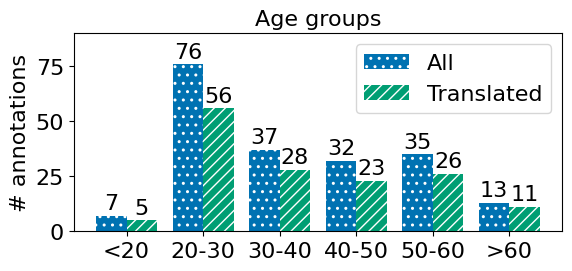

In [21]:
translation_map = {
    "Tra 20 e 30": "20-30",
    "Tra 30 e 40": "30-40",
    "Tra 40 e 50": "40-50",
    "Tra 50 e 60": "50-60",
    "Meno di 20": "<20",
    "Più di 60": ">60",
}
title = "Age groups"
data_key = "age-group"
feature = []
for entry in data:
    feature.append(entry["data"][data_key])
    
feature = [p for p in feature if p != ""]
feature = [translation_map.get(p, p) for p in feature]
feature = [p for p in feature if p != "" and p != "Other"]

feature_counts = Counter(feature)
keys = ["<20", "20-30", "30-40", "40-50", "50-60", ">60"]
values = [feature_counts.get(k, 0) for k in keys]
plt.figure(figsize=(6, 3))
plt.bar([i - 0.2 for i in range(len(keys))], values, label="All", width=0.4, hatch='..')
for i in range(len(keys)):
    plt.text(i - 0.2, values[i] + 3, str(values[i]), ha='center')
plt.xticks(range(len(feature_counts)), labels = keys, rotation=0)
# plt.yticks(range(0, max(feature_counts.values()) + 1, 10))
plt.ylabel("# annotations")
plt.title(title)
# plt.xlabel(xlabel)
plt.ylim(0,90)

feature = []
for entry in data:
    if not entry["data"]["empty"]:
        feature.append(entry["data"][data_key])
    
feature = [p for p in feature if p != ""]
feature = [translation_map.get(p, p) for p in feature]
feature_counts = Counter(feature)
values = [feature_counts.get(k, 0) for k in keys]
plt.bar([i + 0.2 for i in range(len(keys))], values, label="Translated", width=0.4, hatch='///')
for i in range(len(keys)):
    plt.text(i + 0.2, values[i] + 3, str(values[i]), ha='center')
plt.legend()
plt.tight_layout()
plt.savefig("plots/age_distribution.pdf")
plt.show()

## Evaluation Score

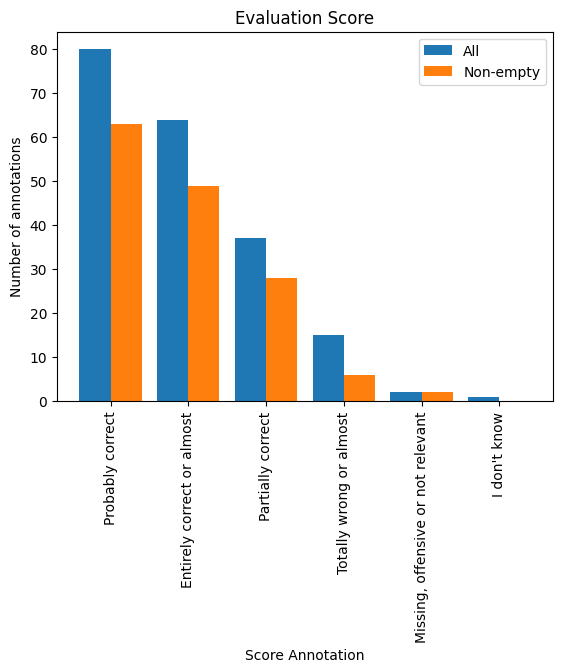

In [100]:
translation_map = {
    "Probabilmente corretta, l'avrei scritta in altro modo": "Probably correct",
    "Interamente corretta o quasi": "Entirely correct or almost",
    "Parzialmente corretta": "Partially correct",
    "Totalmente sbagliata o quasi": "Totally wrong or almost",
    "Risposta mancante, offensiva o non pertinente": "Missing, offensive or not relevant",
    "Non lo so": "I don't know",
}
plot_data(data, "translation-evaluation", None, "Evaluation Score", "Score Annotation", translation_map, rot=90)